<h3><strong>predicting house price</strong></h3>

<p><strong>in this programming case, we want to use machine learning (simple regression) to predict the price of house.&nbsp;We just get one input which is the house size and az output we have&nbsp;the price of house.</strong></p>


###### Firstly, we add some packages that we need to use in our programm

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Then we should read our data with pandas ,geting a sample of data to see what columns we have .
<br>

In [4]:
address = 'house_data.csv'
data = pd.read_csv(address)
print(data.shape)
data.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### now we want to see the graph of our data and how much this 2 data depend togheder .
##### we get all of our data in range of log2 

In [41]:
price = data["price"].head(100)
price = np.log2(price)

In [42]:
sqft_living = data["sqft_living"].head(100)
sqft_living = np.log2(sqft_living)

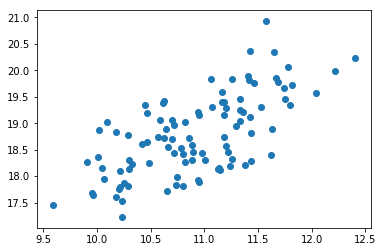

In [43]:
plt.scatter(sqft_living,price)

<h4>Now we need a function which can predict the nearest price of house with a real price, moreover, we know that we have to use this formula:</h4>

<h4><br />
<span style="color:#e74c3c"><strong>price ( Y ) = W0 + W1(square feet ( X ) ) + e.</strong></span></h4>

<h4 sryle ="line-high:2"><br />
This is a line Formula y=mx+c. If we match this 2 formula, we can result that W1 is our slop and W0 is our started line and e is an error in our case.    In addition, we do not have W1 and W0, so first we have to find these two variables. Therefore, the formula of finding m or W1 ( SLOP ) is : &nbsp;</h4>

<h4><span style="color:#e74c3c"><span style="font-size:22px"><strong>&Sigma; (</strong></span>( X - mean( X ) ) * ( Y - mean ( Y ) / &nbsp; ( X - mean( X ) )<sup>2&nbsp;</sup><strong>)</strong></span></h4>

<h4>Furthermore, we can calculate the W0 base on W1 and Y and X:</h4>

<h4><br />
<span style="color:#e74c3c">Y = MX + C , C = Y-MX</span></h4>


In [97]:
#mean x and y
mean_x = np.mean(sqft_living)
mean_y = np.mean(price)
#total number of values
m = len(sqft_living)
#using the formula to finding W0 and W1
number = 0
dumer = 0
for i in range(m):
    number += (sqft_living[i]-mean_x) * (price[i]-mean_y)
    dumer += (sqft_living[i]-mean_x) ** 2
w1 = number / dumer
w0 = mean_y - (w1 * mean_x)
print('W1 is :',w1,' and W2 is :',w0)

W1 is : 0.88076469887974  and W2 is : 9.167958118815898


<h4><span style="font-family:Trebuchet MS,Helvetica,sans-serif">now we want to use mathplot to display our regression line in our real data</span></h4>


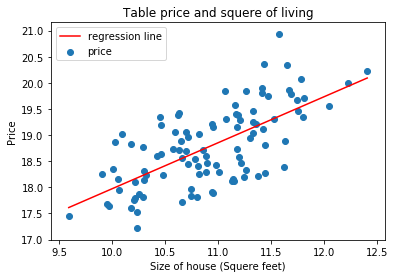

In [124]:
min_x = np.min(sqft_living) 
max_x = np.max(sqft_living) 
# Start and end point of line

x = np.linspace(min_x,max_x)
y = (w0) + (w1*x) 

#regression line

plt.plot(x,y, color='red',label= 'regression line')

#real data scatter

plt.scatter(sqft_living,price)
plt.ylabel('Price')
plt.xlabel('Size of house (Squere feet)')
plt.title('Table price and squere of living')
plt.legend()
plt.show()

<div><span style="font-family:Trebuchet MS,Helvetica,sans-serif">We have RSS which is the summation of Error ( distance between our real data and our predicted data ) and TSS&nbsp;which is the summation of mean error ( distance between our real data and our mean Y). After measuring this 2 we should find R-squared ( value is a statistical measure of how close the data are to the fitted regression line )</span>

</div>


In [125]:
rss = 0
tss = 0
for i in range (len(Y)):
    y_predict = w0 + w1 *X[i] 
    rss += (Y[i] - y_predict) ** 2 
    tss += (Y[i] - mean_y) ** 2
r2 =1 - (rss/tss)
print('R2 is : ',r2 ,' and RSS is :', rss)

R2 is :  0.006071183874922004  and RSS is : 35909715350469.25


In [142]:
def predict(x):
    m = len(x)
    error = []
    actual =np.log2(data["price"])
    for i in range(m):
        y_predict = w0 + w1 * sqft_living[i]
        y_predict = y_predict
        error = price[i]-y_predict
        print('This is Predict value for index',i+1,':',y_predict,"\n",'This is Actual value:', actual[i],"\n")
        

In [143]:
predict(sqft_living)

This is Predict value for index 1 : 18.155784149877434 
 This is Actual value: 17.759550141971737 

This is Predict value for index 2 : 19.144866612424515 
 This is Actual value: 19.037246647218712 

This is Predict value for index 3 : 17.613359477468265 
 This is Actual value: 17.457637380991763 

This is Predict value for index 4 : 18.800562739918238 
 This is Actual value: 19.204189023987166 

This is Predict value for index 5 : 18.604687345906704 
 This is Actual value: 18.960137721520944 

This is Predict value for index 6 : 20.093031382598475 
 This is Actual value: 20.22435031855202 

This is Predict value for index 7 : 18.63088775585364 
 This is Actual value: 17.974212906732667 

This is Predict value for index 8 : 18.019509950259714 
 This is Actual value: 18.154867542656962 

This is Predict value for index 9 : 18.67815722123984 
 This is Actual value: 17.808134628075894 

This is Predict value for index 10 : 18.754351288634183 
 This is Actual value: 18.301174639356013 

Th